In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math

# 1. Parameters Initialization

## 1.1 Parameters which used to calculate $\rho_{1}$

In [ ]:
A11 = np.array([[0.3, 0.5], [0.5, 0.3]])
A12 = np.array([[0.3, 0.5], [0.5, 0.3]])
A21 = np.array([[0.2, 0.0], [0.0, 0.2]])
A22 = np.array([[0.2, 0.0], [0.0, 0.2]])

B11 = np.array([[0.01, 0.0], [0.01, 0.01]])
B12 = np.array([[0.01, 0.0], [0.01, 0.01]])
C11 = np.array([[0.01, 0.0], [0.01, 0.01]])
C12 = np.array([[0.01, 0.0], [0.01, 0.01]])
D1 = np.array([[1, 0], [0, 1]])
D2 = np.array([[1, 0], [0, 1]])

B21 = np.array([[0.0, 0.0], [0.0, 0.0]])
B22 = np.array([[0.0, 0.0], [0.0, 0.0]])
C21 = np.array([[0.0, 0.0], [0.0, 0.0]])
C22 = np.array([[0.0, 0.0], [0.0, 0.0]])
E1 = np.array([[-1, 0], [0, -1]])
E2 = np.array([[-1, 0], [0, -1]])

Sigma1 = np.array([[1, 0], [0, 0]])
Sigma2 = np.array([[0, 0], [0, 1]])
w1, w2 = 0.1, 0.3
W = np.array([[w1, 0], [0, w2]])
I = np.array([[1, 0], [0, 1]])

alpha = 0.9999
beta = 0.01

## 1.2 Parameters which used to draw figs

In [ ]:
A11 = np.array([[0.25, -0.07], [-0.01, 0.12]])
A12 = np.array([[0.35, -0.01], [-0.05, 0.14]])
A21 = np.array([[0.22, -0.1], [-0.08, 0.32]])
A22 = np.array([[0.51, -0.02], [-0.05, 0.28]])
B11 = np.array([[-0.45, 0.02], [0.02, -0.05]])
B12 = np.array([[-0.53, 0.08], [0.01, -0.03]])
B21 = np.array([[-0.05, 0.01], [0.02, -0.4]])
B22 = np.array([[-0.03, 0.03], [0.03, -0.55]])
D1 = np.array([[1, 0], [0, 1]])
E1 = np.array([[-1, 0.5], [0.5, -1]])
D2 = np.array([[1, 0], [0, 1]])
E2 = np.array([[-1, 0.5], [0.5, -1]])

Sigma1 = np.array([[1, 0], [0, 0]])
Sigma2 = np.array([[0, 0], [0, 1]])
w1, w2 = 0.1, 0.3
W = np.array([[w1, 0], [0, w2]])
I = np.array([[1, 0], [0, 1]])

alpha = 0.5
beta = 0.3

In [ ]:
Num_p, Num_q, Num_r = 15, 20, 1000

x = np.zeros((Num_r, Num_p, Num_q, 2, 1))
y = np.zeros((Num_r, Num_p, Num_q, 2, 1))
u = np.zeros((Num_r, Num_p, Num_q, 2, 1))
y_ba = np.zeros((Num_r, Num_p, Num_q, 2, 1))
y_hat = np.zeros((Num_r, Num_p, Num_q, 2, 1))
e = np.zeros((Num_r, Num_p, Num_q, 2, 1))
e_hat = np.zeros((Num_r, Num_p, Num_q, 2, 1))
sigma = np.zeros((Num_r, Num_p, Num_q))

# Initialize x
for r in range(Num_r):
    for p in range(Num_p):
        x[r][p][0] = np.array([[-math.sin(2 * math.pi * p / 10)], [- math.cos(2 * math.pi * p / 10)]])\
        + np.array([[pow(0.2, r)], [pow(0.2, r)]])
    for q in range(Num_q):
        x[r][0][q] = np.array([[-math.sin(2 * math.pi * q / 10)], [- math.cos(2 * math.pi * q / 10)]])\
        + np.array([[pow(0.2, r)], [pow(0.2, r)]])

In [ ]:
def lambda1(r, p, q):
    return (math.sin(x[r][p][q][0]) + p * q) / (2 + math.cos(x[r][p][q][0]) + p * q)

In [ ]:
def lambda2(r, p, q):
    return 1 - lambda1(r, p, q)

In [ ]:
def cal_x(r, p, q):
    if p-1 < 0:
        result1 = lambda1(r, p-1, q) * (A11 @ x[r][0][q] + B11 @ u[r][0][q])
        result2 = lambda2(r, p-1, q) * (A12 @ x[r][0][q] + B12 @ u[r][0][q])
    else:
        result1 = lambda1(r, p-1, q) * (A11 @ x[r][p-1][q] + B11 @ u[r][p-1][q])
        result2 = lambda2(r, p-1, q) * (A12 @ x[r][p-1][q] + B12 @ u[r][p-1][q])
    if q-1 < 0:
        result3 = lambda1(r, p, q-1) * (A21 @ x[r][p][0] + B21 @ u[r][p][0])
        result4 = lambda2(r, p, q-1) * (A22 @ x[r][p][0] + B22 @ u[r][p][0])
    else:
        result3 = lambda1(r, p, q-1) * (A21 @ x[r][p][q-1] + B21 @ u[r][p][q-1])
        result4 = lambda2(r, p, q-1) * (A22 @ x[r][p][q-1] + B22 @ u[r][p][q-1])
    return result1 + result2 + result3 + result4

In [ ]:
def cal_y(r, p, q):
    result1 = lambda1(r, p, q) * (D1 @ x[r][p][q] + E1 @ u[r][p][q])
    result2 = lambda2(r, p, q) * (D2 @ x[r][p][q] + E2 @ u[r][p][q])
    return result1 + result2

In [ ]:
def cal_sigma(r, p, q):
    if q-1 < 0:
        result1 = (y[r][p][q] - np.zeros((2, 1))).T @ W @ Sigma1 @ (y[r][p][q] - np.zeros((2, 1)))
        result2 = (y[r][p][q] - np.zeros((2, 1))).T @ W @ Sigma2 @ (y[r][p][q] - np.zeros((2, 1)))
    else:
        result1 = (y[r][p][q] - y_ba[r][p][q-1]).T @ W @ Sigma1 @ (y[r][p][q] - y_ba[r][p][q-1])
        result2 = (y[r][p][q] - y_ba[r][p][q-1]).T @ W @ Sigma2 @ (y[r][p][q] - y_ba[r][p][q-1])
    if result1 > result2:
        return 1
    else:
        return 2

In [ ]:
def cal_zeta(r, p, q):
    return 0.25 * np.array([[math.sin(r * p)], [math.sin(r * q)]])

In [ ]:
def cal_y_ba(r, p, q):
    if sigma[r][p][q] == 1:
        Sigma = Sigma1
    else:
        Sigma = Sigma2
    result1 = (1 - alpha) * Sigma @ y[r][p][q]
    if q-1 < 0:
        result2 = np.zeros((2, 1))
    else:
        result2 = (I - Sigma) @ y_ba[r][p][q-1]
    result3 = alpha * beta * Sigma @ cal_zeta(r, p, q)
    
    return result1 + result2 + result3

In [ ]:
def cal_y_star(p, q):
    return np.array([[math.sin(2 * math.pi * (p + q)) / 10], [0.5 * math.cos(2 * math.pi * (p-q)) / 10]])

In [ ]:
def cal_y_hat(r, p, q):
    if sigma[r][p][q] == 1:
        Sigma = Sigma1
    else:
        Sigma = Sigma2
    return y_ba[r][p][q] + (I - (1 - alpha) * Sigma) @ cal_y_star(p, q)

In [ ]:
def cal_u(r, p, q):
    return u[r-1][p][q] + lambda1(r-1, p, q) * np.array([[0.5, 0], [0, 0.5]]) @ e_hat[r-1][p][q]\
            + lambda2(r-1, p, q) * np.array([[0.5, 0], [0, 0.5]]) @ e_hat[r-1][p][q]

# 2. Iterative learning calculation

In [ ]:
for r in range(Num_r):
    for p in range(Num_p):
        for q in range(Num_q):
            if q == 0 or p == 0 :
                continue
            x[r][p][q] = cal_x(r, p, q)
            y[r][p][q] = cal_y(r, p, q)
            sigma[r][p][q] = cal_sigma(r, p, q)
            y_ba[r][p][q] = cal_y_ba(r, p, q)
            y_hat[r][p][q] = cal_y_hat(r, p, q)
            e[r][p][q] = y[r][p][q] - cal_y_star(p, q)
            e_hat[r][p][q] = y_hat[r][p][q] - cal_y_star(p, q)
            if r != Num_r-1:
                u[r+1][p][q] = cal_u(r+1, p, q)

## 2.1 Calculate the error $e_r$ and $\hat{e_r}$

In [ ]:
result_e = np.zeros((Num_p, Num_q))
for p in range(Num_p):
    for q in range(Num_q):
        result_e[p][q] = abs(e[Num_r-1][p][q][0][0]) + abs(e[Num_r-1][p][q][1][0])

In [ ]:
result_e_hat = np.zeros((Num_p, Num_q))
for p in range(Num_p):
    for q in range(Num_q):
        result_e_hat[p][q] = abs(e_hat[Num_r-1][p][q][0][0]) + abs(e_hat[Num_r-1][p][q][1][0])

# 3. Calculate $\rho_1$

In [ ]:
phi = np.zeros((Num_r, Num_q))

In [ ]:
# 初始化
omega_6 = np.zeros((Num_q, 16, 15, 2, 2))
omega_1_ni = np.zeros((Num_q, 15, 15, 2, 2))
omega_2 = np.zeros((Num_q, 15, 15, 2, 2))
omega_5_tilde = np.zeros((Num_q, 32, 30))

delta_x = np.zeros((Num_q, 30, 1))

omega_5 = np.zeros((Num_q, 15, 1, 2, 2))
omega_8 = np.zeros((Num_q, 16, 1, 2, 2))
omega_8_tilde = np.zeros((Num_q, 32, 2))

x_6 = np.zeros((Num_q, 2, 1))
V_1 = np.zeros((Num_q, 30, 1))

omega_6_tilde = np.zeros((Num_q, 30, 30))
omega_3 = np.zeros((Num_q, 14, 15, 2, 2))
omega_7 = np.zeros((Num_q, 15, 15, 2, 2))

In [ ]:
def cal_omega_6(r):
    for q in range(Num_q):
        for j in range(Num_p): 
            if sigma[r][j][q] == 1:
                Sigma = Sigma1
            else:
                Sigma = Sigma2
            D = lambda1(r, j, q) * np.array([[1, 0], [0, 1]]) + lambda2(r, j, q) \
                * np.array([[1, 0], [0, 1]])
            omega_6[q][j+1][j] = Sigma @ D

In [ ]:
def cal_omega_1_ni(r):
    for q in range(Num_q):
        for i in range(Num_p-1):
            for j in range(Num_p-1):
                if i == j:
                    omega_1_ni[q][i][j] = np.array([[1, 0], [0, 1]])
                elif i > j:
                    M = i - j 
                    A = np.array([[1, 0], [0, 1]])
                    for m in range(M):
                        A = A @ ((lambda1(r, i-m-1, q) * A11 + lambda2(r, i-m-1, q) * A12))
                    omega_1_ni[q][i][j] = A 
                else:
                    continue

In [ ]:
def cal_omega_2(r):
    for q in range(Num_q):
        for j in range(Num_p):
            if q == 0:
                omega_2[q][j][j] = np.zeros((2, 2))
                continue
            omega_2[q][j][j] = lambda1(r, j, q-1) * A11 + lambda2(r, j, q-1) 

In [ ]:
def cal_omega_3(r):
    for q in range(Num_q):
        for i in range(Num_p-1):
            omega_3[q][i][i] = (lambda1(r, i, q) * B11 + lambda2(r, i, q) * B12) @ \
                                (lambda1(r, i, q) * np.array([[0.5, 0], [0, 0.5]]) + lambda2(r, i, q) \
                                * np.array([[0.5, 0], [0, 0.5]]))

In [ ]:
def cal_omega_7(r):
    for q in range(Num_q):
        for i in range(Num_p):
            if sigma[r][i][q] == 1:
                Sigma = Sigma1
            else:
                Sigma = Sigma2
            E = lambda1(r, i, q) * np.array([[-1, -0.5], [0.5, 1]]) + lambda2(r, i, q) \
                * np.array([[-1, -0.5], [0.5, 1]])
            Gamma =  lambda1(r, i, q) * np.array([[0.5, 0], [0, 0.5]]) + lambda2(r, i, q) \
                                * np.array([[0.5, 0], [0, 0.5]])
            omega_7[q][i][i] = np.array([[1, 0], [0, 1]]) + Sigma @ E @ Gamma

In [ ]:
def cal_omega_5_tilde(r):
    
    cal_omega_6(r)
    cal_omega_1_ni(r)
    cal_omega_2(r)
    for q in range(Num_q):
        temp1 = omega_6[q].transpose(0, 2, 1, 3).reshape(32, 30)
        temp2 = omega_1_ni[q].transpose(0, 2, 1, 3).reshape(30, 30)
        temp3 = omega_2[q].transpose(0, 2, 1, 3).reshape(30, 30)

        omega_5_tilde[q] = temp1 @ temp2 @ temp3


In [ ]:
def cal_delta_x(r):
    for q in range(Num_q):
        if q == 0:
            delta_x[q] = np.zeros((30, 1))
            continue
    
        for p in range(Num_p):
            if p == 0:
                temp_x = (x[r+1][p][q-1]-x[r][p][q-1]).T
            else:
                temp_x = np.concatenate((temp_x, (x[r+1][p][q-1]-x[r][p][q-1]).T))
            if p == 14:
                temp_x = temp_x.reshape(1, 30)
                delta_x[q] = temp_x.T

In [ ]:
def cal_omega_5(r):
    for q in range(Num_q):
        omega_5[q][0][0] = lambda1(r, 0, q) * A11 + lambda2(r, 0, q) * A12

In [ ]:
def cal_omega_8(r):
    for q in range(Num_q):
        if sigma[r][0][q] == 1:
            Sigma = Sigma1
        else:
            Sigma = Sigma2
        omega_8[q][0][0] = (1 - alpha) * Sigma @ (lambda1(r, 0, q) * D1 + lambda2(r, 0, q) * D2)    

In [ ]:
def cal_omega_8_tilde(r):
    cal_omega_5(r)
    cal_omega_8(r)
    for q in range(Num_q):
        temp1 = omega_6[q].transpose(0, 2, 1, 3).reshape(32, 30)
        temp2 = omega_1_ni[q].transpose(0, 2, 1, 3).reshape(30, 30)
        temp3 = omega_5[q].transpose(0, 2, 1, 3).reshape(30, 2)
        temp4 = omega_8[q].transpose(0, 2, 1, 3).reshape(32, 2)
        
        omega_8_tilde[q] = temp1 @ temp2 @ temp3 + temp4

In [ ]:
def cal_x_6(r):
    for q in range(Num_q):
        x_6[q] = x[r+1][0][q] - x[r][0][q]

In [ ]:
def cal_V_1(r):
    for q in range(Num_q):
        if q == 0:
            V_1[q] = np.zeros((30, 1))
            continue
        
        for p in range(Num_p):
            if sigma[r][p][q] == 1:
                Sigma = Sigma1
            else:
                Sigma = Sigma2
            if p == 0:
                temp_v = ((I - Sigma) @ (y_ba[r+1][p][q-1] - y_ba[r][p][q-1]) + \
                alpha * beta * Sigma @ (cal_zeta(r+1, p, q) - cal_zeta(r, p, q))).T
            else:
                temp_v = np.concatenate((temp_v, ((I - Sigma) @ (y_ba[r+1][p][q-1] - y_ba[r][p][q-1]) + \
                alpha * beta * Sigma @ (cal_zeta(r+1, p, q) - cal_zeta(r, p, q))).T))
            if p == 14:
                temp_v = temp_v.reshape(1, 30)
                V_1[q] = temp_v.T

In [ ]:
def cal_phi():
    for r in range(Num_r-1):
        cal_omega_5_tilde(r)
        cal_delta_x(r)
        cal_omega_8_tilde(r)
        cal_x_6(r)
        cal_V_1(r)
        for q in range(Num_q):
            E_1 = np.max(np.sum(np.abs(omega_5_tilde[q]), axis=0))
            E_2 = np.max(np.sum(np.abs(delta_x[q]), axis=0))
            
            E_5 = np.max(np.sum(np.abs(omega_8_tilde[q]), axis=0))
            E_6 = np.max(np.sum(np.abs(x_6[q]), axis=0))
            
            E_7 = np.max(np.sum(np.abs(V_1[q]), axis=0))            
            
            phi[r][q] = E_1 * E_2 + E_5 * E_6 + E_7

In [ ]:
cal_phi()

In [ ]:
def cal_rho():
    max_rho = 0
    max_phi = (0, 0)
    for r in range(Num_r-1):
        E_1 = np.zeros((Num_q, Num_p, 2, 1))
        E_2 = np.zeros((Num_q, Num_p, 2, 1))
        
        for q in range(Num_q):
            for p in range(Num_p):
                if sigma[r][p][q] == 1:
                    Sigma = Sigma1
                else:
                    Sigma = Sigma2
                if q == 0:
                    E_1[0][p] = (I - Sigma) @ np.zeros((2, 1))
                else:
                    E_1[q][p] = (I - Sigma) @ y_ba[r][p][q-1]
                E_2[q][p] = Sigma @ cal_zeta(r, p, q)

        if r < 998:
            continue
        else:
            for q in range(Num_q):
                temp1 = phi[r][q] 
                temp2 = np.max(E_1[q])
                temp3 = alpha * beta * np.max(E_2[q])
                temp = temp1 + temp2 + temp3
                if temp > max_rho:
                    max_rho = temp
                    max_phi = (r, q)
                    print('max_phi', max_phi)
                    print('phi', phi[r][q])

    print(max_rho)
    return  (1/(1-alpha)) * max_rho

                
                    

In [ ]:
cal_rho()

# 4. Draw the figs

In [ ]:
plt.rc('font', family='Times New Roman') 
plt.rc('text', usetex=True) #Latex 
plt.rc('text.latex', preamble=r'\usepackage{amssymb}') 

In [ ]:
m = np.arange(0, Num_p)
n = np.arange(0, Num_q)

X, Y = np.meshgrid(m, n)
Z1 = result_e.T
Z2 = result_e_hat.T

In [ ]:
fig = plt.figure(figsize=(12, 15), constrained_layout=True) 
ax = fig.add_subplot(111, projection='3d') 
ax.plot_surface(X, Y, Z1, cmap='rainbow', rstride=2, cstride=2, edgecolor='green', shade=True, alpha=0.7)

Z_plane = np.full_like(Z2, 0.18)
ax.plot_surface(X, Y, Z_plane, color='red', alpha=0.3)

ax.set_xlabel(r'$p$', fontsize=30, labelpad=30, fontweight='bold')
ax.set_ylabel(r'$q$', fontsize=30, labelpad=30, fontweight='bold')
ax.set_zlabel(r'$\mathbb{E}(||{e_r}(p,q)||)$', fontsize=20, labelpad=0, fontweight='bold')
ax.zaxis.set_rotate_label(False) 



ax.xaxis._axinfo['axisline']['linewidth'] = 1.2
ax.yaxis._axinfo['axisline']['linewidth'] = 1.2
ax.zaxis._axinfo['axisline']['linewidth'] = 1.2


plt.tick_params(labelsize=30)
ax.zaxis.get_offset_text().set_fontsize(30)

ax.set_xticks(np.linspace(0, 15, 6))  
ax.set_yticks(np.linspace(0, 20, 6))  
ax.set_zticks(np.linspace(0, 0.4, 3))  
ax.tick_params(axis='z', which='major', pad=10)

ax.set_title(r'$r={}$'.format(Num_r), fontsize=30, x=0.45, y=0.97)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.view_init(elev=20, azim=20)



ax.set_zlabel('')
ax.zaxis.set_rotate_label(False)

ax.tick_params(axis='z', pad=5)

fig.text(
    0.05, 0.70, 
    r'$\mathbb{E}(||e_r(p,q)||)$', 
    rotation=0,
    fontsize=25, fontweight='bold',
    ha='center', va='center'
)

fig.subplots_adjust(left=0.2, right=0.8, top=0.92, bottom=0.08)

# plt.savefig('./outputs/708_e_r=500.eps', dpi=300, format='eps', bbox_inches='tight')
plt.savefig('./outputs/708_e_r=1000.eps', dpi=300, format='eps', bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

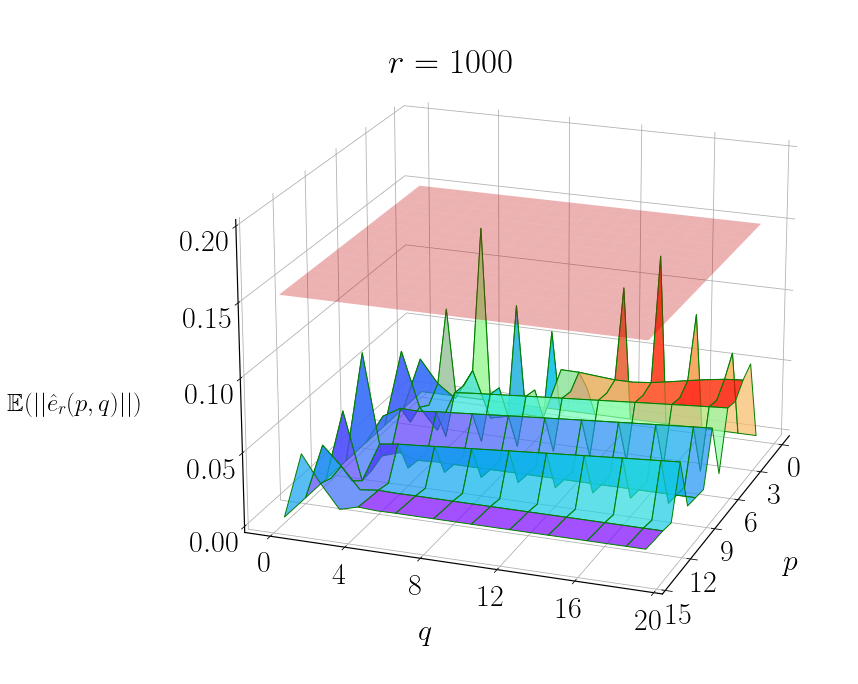

In [ ]:
fig = plt.figure(figsize=(12, 15), constrained_layout=True) 
ax = fig.add_subplot(111, projection='3d') 
ax.plot_surface(X, Y, Z2, cmap='rainbow', rstride=2, cstride=2, edgecolor='green', shade=True, alpha=0.7)

Z_plane = np.full_like(Z2, 0.15)
ax.plot_surface(X, Y, Z_plane, color='red', alpha=0.3)


ax.set_xlabel(r'$p$', fontsize=30, labelpad=30, fontweight='bold')
ax.set_ylabel(r'$q$', fontsize=30, labelpad=30, fontweight='bold')
ax.set_zlabel(r'$\mathbb E(||{\hat e_r}(p,q)||)$', fontsize=25, labelpad=75, fontweight='bold')
ax.zaxis.set_rotate_label(False) 

ax.xaxis._axinfo['axisline']['linewidth'] = 1.2
ax.yaxis._axinfo['axisline']['linewidth'] = 1.2
ax.zaxis._axinfo['axisline']['linewidth'] = 1.2

plt.tick_params(labelsize=30)
ax.zaxis.get_offset_text().set_fontsize(30)

ax.set_xticks(np.linspace(0, 15, 6))  
ax.set_yticks(np.linspace(0, 20, 6))  
ax.set_zticks(np.linspace(0, 0.4, 3)) 
ax.tick_params(axis='z', which='major', pad=10)


ax.set_title(r'$r={}$'.format(Num_r), fontsize=30, x=0.45, y=0.97)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.view_init(elev=20, azim=20)

ax.set_zlabel('')
ax.zaxis.set_rotate_label(False)

ax.tick_params(axis='z', pad=5)

fig.text(
    0.05, 0.70, 
    r'$\mathbb E(||{\hat e_r}(p,q)||)$', 
    rotation=0,
    fontsize=25, fontweight='bold',
    ha='center', va='center'
)

fig.subplots_adjust(left=0.2, right=0.8, top=0.92, bottom=0.08)

# plt.savefig('./outputs/708_e_hat_r=500.eps', dpi=300, format='eps', bbox_inches='tight')
plt.savefig('./outputs/708_e_hat_r=1000.eps', dpi=300, format='eps', bbox_inches='tight')


plt.show()

In [ ]:
result_sigma = sigma[Num_r-1] 

x = np.arange(0, Num_p)
y = np.arange(0, Num_q)

X, Y = np.meshgrid(x, y)
Result_sigma = result_sigma.T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

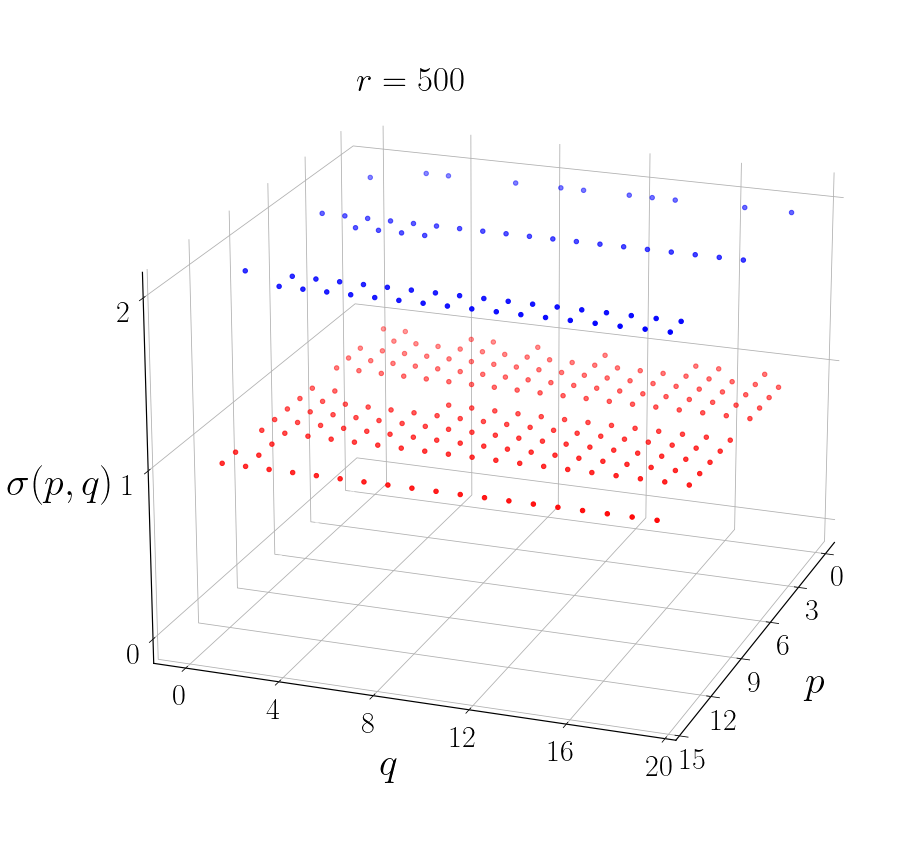

In [ ]:
fig = plt.figure(figsize=(15, 18), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d') 
# ax.plot_surface(X, Y, Result_sigma, cmap=new_cmap, edgecolor='none', shade=True)
color_map = {1: 'red', 2: 'blue', 0:'white'}
colors = np.vectorize(color_map.get)(Result_sigma)
ax.scatter(X.flatten(), Y.flatten(), Result_sigma.flatten(), c=colors.flatten(), marker='o')


ax.set_xlabel(r'$p$', fontsize=40, labelpad=25)
ax.set_ylabel(r'$q$', fontsize=40, labelpad=25)
ax.set_zlabel(r'$\sigma(p, q)$', fontsize=40, labelpad=30)
ax.zaxis.set_rotate_label(False) 

ax.xaxis._axinfo['axisline']['linewidth'] = 1.2
ax.yaxis._axinfo['axisline']['linewidth'] = 1.2
ax.zaxis._axinfo['axisline']['linewidth'] = 1.2

plt.tick_params(labelsize=30)


ax.set_xticks(np.linspace(0, 15, 6))  
ax.set_yticks(np.linspace(0, 20, 6))  
ax.set_zticks(np.linspace(0, 2, 3))  

ax.set_title(r'$r={}$'.format(Num_r), fontsize=35, x=0.4, y=0.97)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.view_init(elev=20, azim=20)

ax.set_zlabel('')
ax.zaxis.set_rotate_label(False)

ax.tick_params(axis='z', pad=5)

fig.text(
    0.05, 0.70, 
    r'$\sigma(p, q)$', 
    rotation=0,
    fontsize=40, fontweight='bold',
    ha='center', va='center'
)

fig.subplots_adjust(left=0.2, right=0.8, top=0.92, bottom=0.08)

# plt.savefig('./outputs/708_sigma_r=500.eps', dpi=300, format='eps')
plt.savefig('./outputs/708_sigma_r=1000.eps', dpi=300, format='eps')

plt.show()